In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import acquire
import prepare
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [3]:
df = acquire.join_data()

Using cached data
Using cached data
Using cached data


In [5]:
df.head()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [6]:
df = prepare.prep_store_data(df)

In [7]:
df.head()

,item,quantity_sold,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,1,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,294.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   quantity_sold  913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store          913000 non-null  int64  
 4   store_address  913000 non-null  object 
 5   store_city     913000 non-null  object 
 6   store_id       913000 non-null  int64  
 7   store_state    913000 non-null  object 
 8   store_zipcode  913000 non-null  int64  
 9   item_brand     913000 non-null  object 
 10  item_id        913000 non-null  int64  
 11  item_name      913000 non-null  object 
 12  item_price     913000 non-null  float64
 13  item_upc12     913000 non-null  int64  
 14  item_upc14     913000 non-null  int64  
 15  month          913000 non-null  int64  
 16  day_of_week    913000 non-nu

In [16]:
#split data into train and test
train = df[:'2016']
test = df['2017']


/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_1598/854778346.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2017']


<AxesSubplot:xlabel='sale_date'>

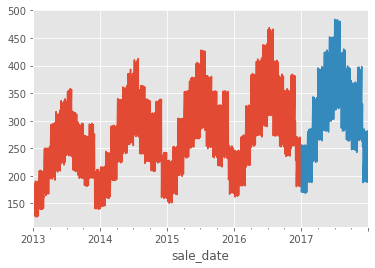

In [17]:
#plot train and test resampled by day
train.resample("D").sales_total.mean().plot()
test.resample("D").sales_total.mean().plot()



In [18]:
# make y the resampled train data for sales_total
y = train.resample("D").sales_total.mean()
y.head()

sale_date
2013-01-01 00:00:00+00:00    147.68802
2013-01-02 00:00:00+00:00    147.14116
2013-01-03 00:00:00+00:00    156.33896
2013-01-04 00:00:00+00:00    168.93546
2013-01-05 00:00:00+00:00    175.24370
Freq: D, Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

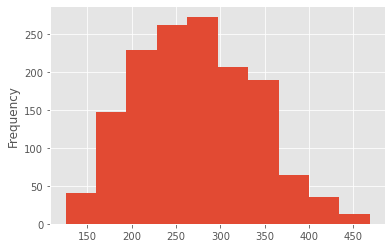

In [19]:
y.plot.hist()

<AxesSubplot:xlabel='sale_date'>

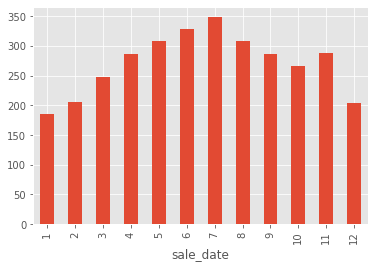

In [26]:
# group by month and plot mean sales_total
y.groupby(y.index.month).mean().plot.bar()

<AxesSubplot:xlabel='month', ylabel='sales_total'>

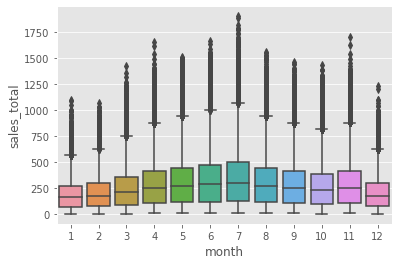

In [51]:
# boxplot train with x as month and y as sales_total with x label month
sns.boxplot(x="month", y="sales_total", data=train)


<AxesSubplot:xlabel='day_of_week', ylabel='sales_total'>

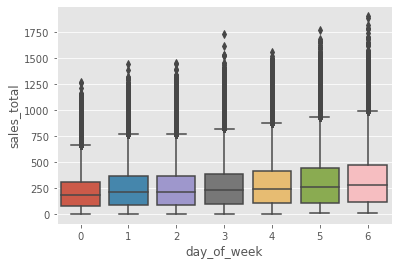

In [54]:
# boxplot train with x as day of week and y as sales_total
sns.boxplot(x='day_of_week', y='sales_total', data = train)


<AxesSubplot:xlabel='sale_date'>

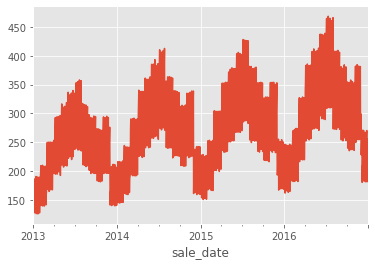

In [55]:
y.plot()

<AxesSubplot:title={'center':'7 day average'}, xlabel='sale_date'>

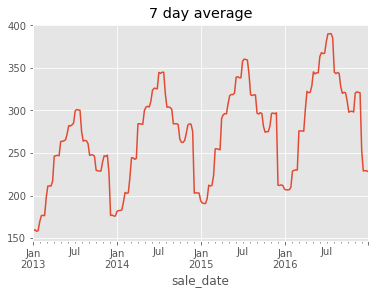

In [60]:
y.resample('7D').mean().plot(title='7 day average')


<AxesSubplot:title={'center':'2 week average'}, xlabel='sale_date'>

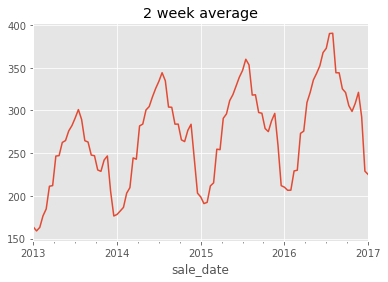

In [61]:
y.resample('2w').mean().plot(title='2 week average')

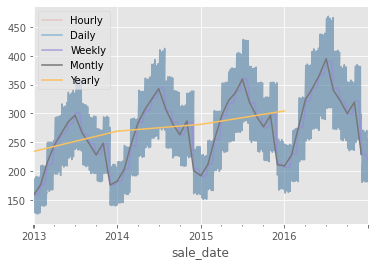

In [65]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

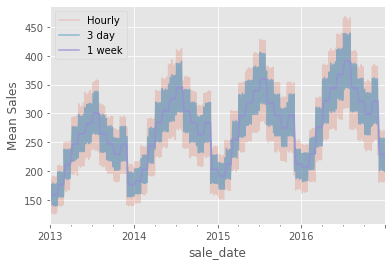

In [71]:
y.plot(alpha=.2, label='Hourly', ylabel='Mean Sales')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()

<AxesSubplot:title={'center':'Average week-to-week change in sales'}, xlabel='sale_date'>

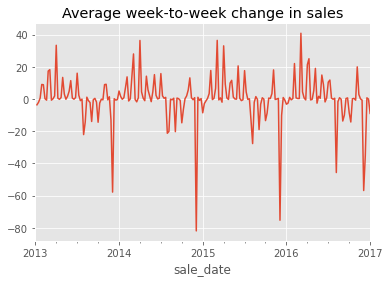

In [72]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sales')


<AxesSubplot:title={'center':'Average month-to-month change in sales'}, xlabel='sale_date'>

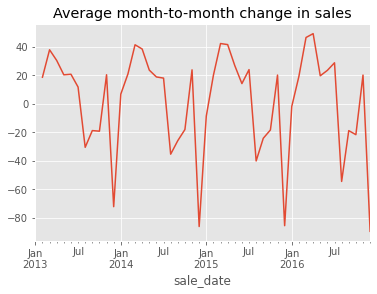

In [73]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in sales')


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

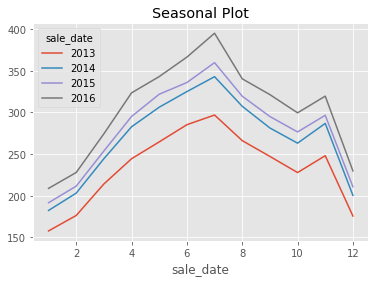

In [74]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


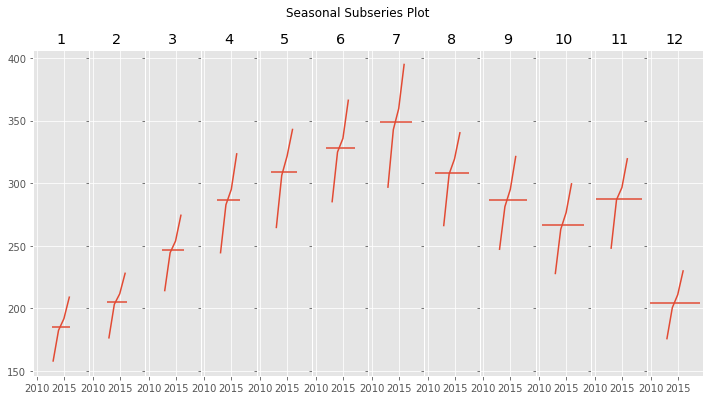

In [76]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)
# change figure size
fig.set_size_inches(12, 6)

Text(0.5, 1.0, 'Lag plot with lag=1')

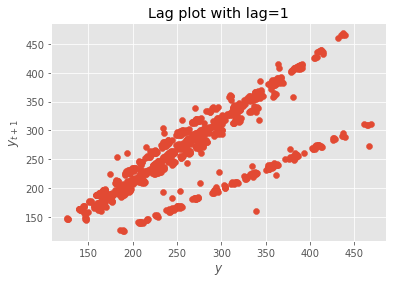

In [77]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_1598/3442748489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y(t + 1)'] = train.sales_total.shift(-1)


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

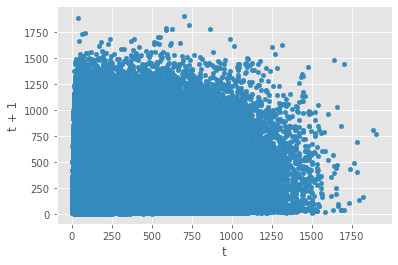

In [83]:
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

In [84]:
del train['y(t + 1)']

<AxesSubplot:xlabel='this_week', ylabel='the_next_week'>

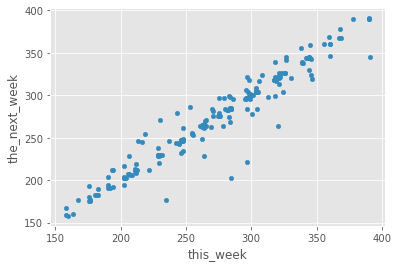

In [89]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')


<AxesSubplot:xlabel='this_week', ylabel='12_weeks_out'>

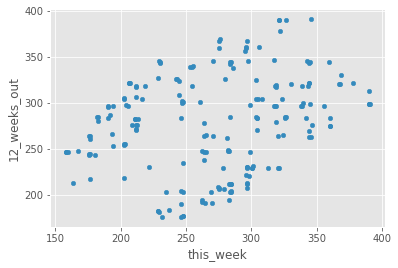

In [88]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sales_total.shift(-12)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')


<AxesSubplot:xlabel='this_week', ylabel='half_a_year_later'>

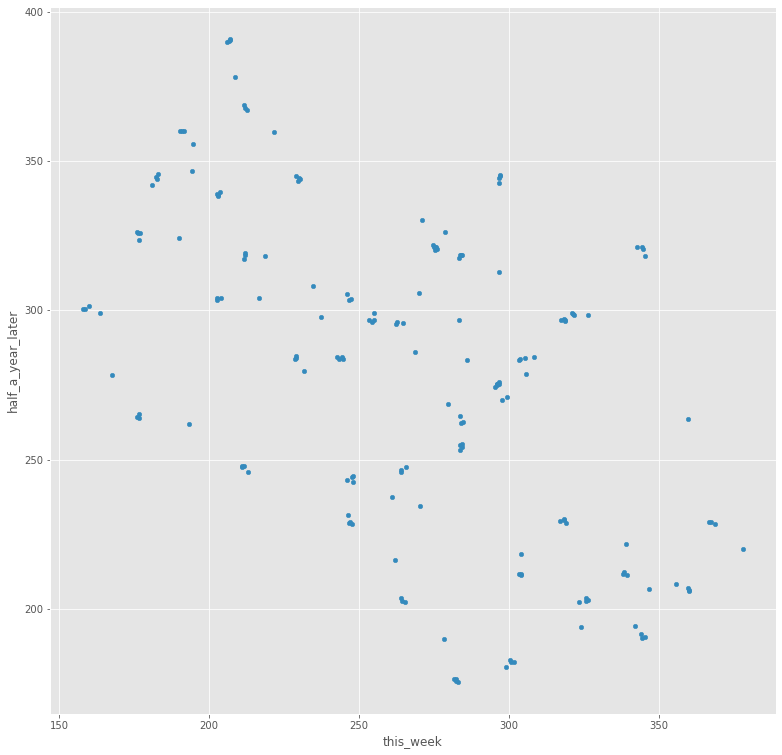

In [90]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

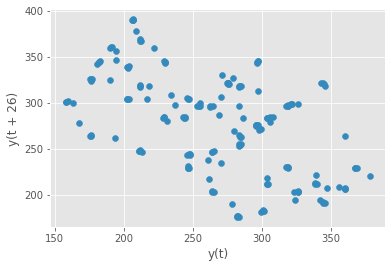

In [92]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=26)


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

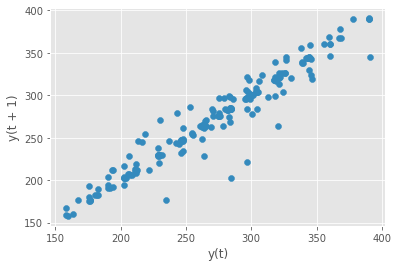

In [93]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=1)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

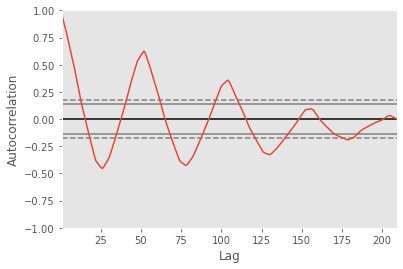

In [94]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())


In [99]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,163.589167,NaN,-77.434789,NaN
2013-01-13 00:00:00+00:00,159.981203,NaN,-79.225757,NaN
2013-01-20 00:00:00+00:00,157.946720,NaN,-79.904284,NaN
2013-01-27 00:00:00+00:00,158.545383,NaN,-80.259357,NaN
2013-02-03 00:00:00+00:00,167.585014,NaN,-77.352692,NaN


<AxesSubplot:xlabel='sale_date'>

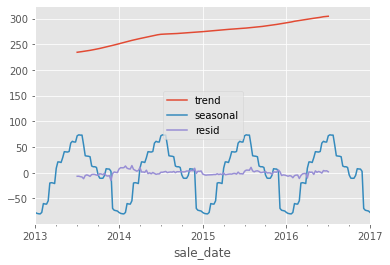

In [100]:
decomposition.iloc[:, 1:].plot()

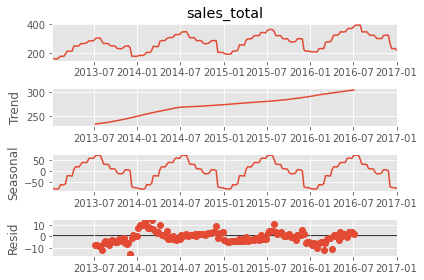

In [102]:
result.plot()
None

In [107]:
train = train.resample('D').mean()
# create a categorical feature
train['sales_bin'] = pd.qcut(train.sales_total, 4, labels=['dismal', 'poor', 'high', 'very high'])
train.groupby('sales_bin').sales_total.mean()

sales_bin
dismal       189.479608
poor         246.929838
high         293.702219
very high    358.484977
Name: sales_total, dtype: float64

Text(0, 0.5, '% of days in the month')

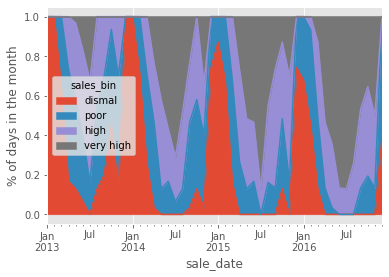

In [108]:
(train.groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_1598/1949154275.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax = (train['2015']


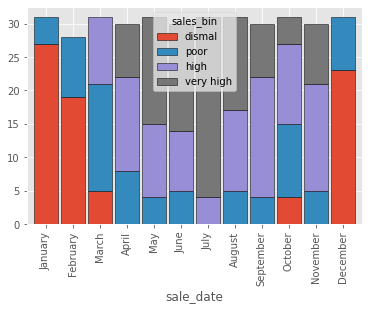

In [110]:
ax = (train['2015']
 .groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.show()

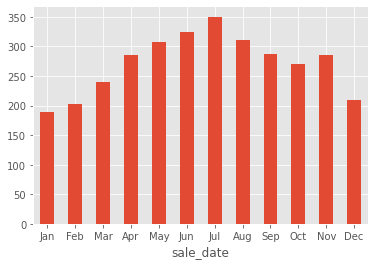

In [111]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

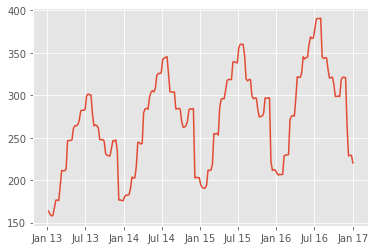

In [112]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

In [113]:
df = prepare.prep_german_power()

In [114]:
df.head()

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   consumption     4383 non-null   float64
 1   wind            4383 non-null   float64
 2   solar           4383 non-null   float64
 3   wind_and_solar  4383 non-null   float64
 4   month           4383 non-null   int64  
 5   year            4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


In [117]:
train = df[:'2013']
test = df['2013':]

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2006-01-01 to 2013-12-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   consumption     2922 non-null   float64
 1   wind            2922 non-null   float64
 2   solar           2922 non-null   float64
 3   wind_and_solar  2922 non-null   float64
 4   month           2922 non-null   int64  
 5   year            2922 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 159.8 KB


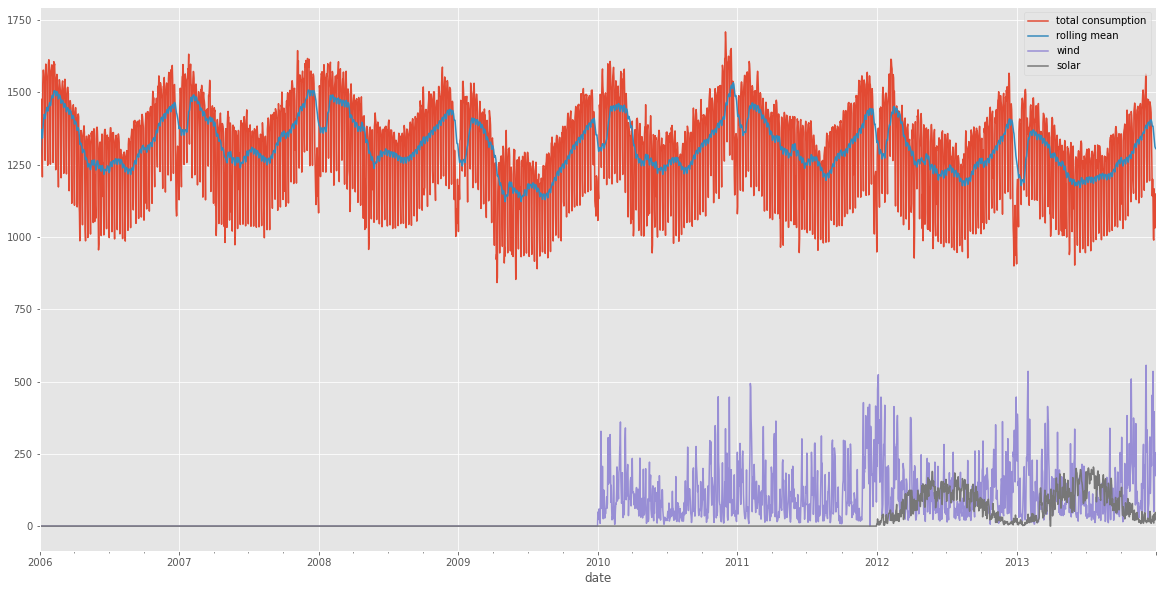

In [132]:
plt.figure(figsize=(20, 10))
train.consumption.plot(label = "total consumption")
plt.plot(train.consumption.rolling('30D').mean(), label = "rolling mean")
train.wind.plot()
train.solar.plot()
plt.legend()



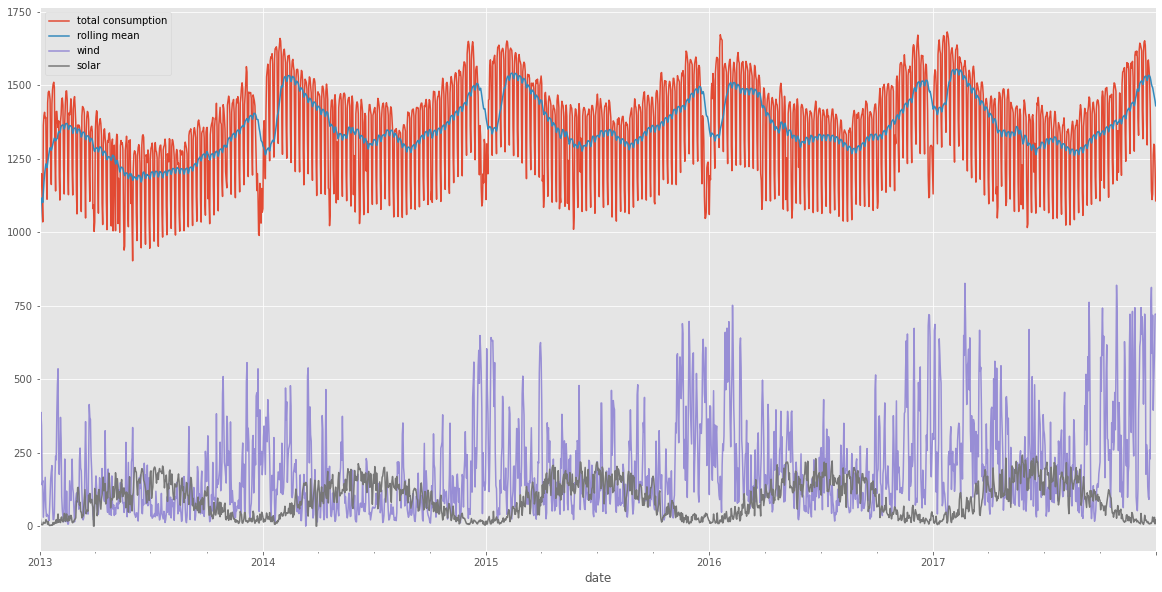

In [131]:
plt.figure(figsize=(20, 10))
test.consumption.plot(label = "total consumption")
plt.plot(test.consumption.rolling('30D').mean(), label = "rolling mean")
test.wind.plot()
test.solar.plot()
plt.legend()


<AxesSubplot:xlabel='month', ylabel='consumption'>

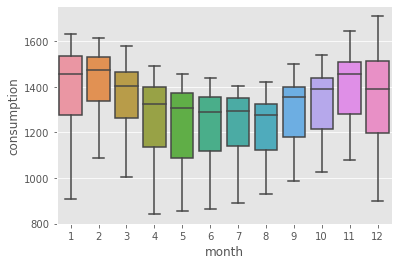

In [134]:
# box plot of consumption by month
sns.boxplot(x='month', y='consumption', data=train)


In [142]:
train['weekday'] = train.index.day_name()
train.head()

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_1598/4155388074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weekday'] = train.index.day_name()


,consumption,wind,solar,wind_and_solar,month,year,weekday
date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006,Sunday
2006-01-02,1380.521,0.0,0.0,0.0,1,2006,Monday
2006-01-03,1442.533,0.0,0.0,0.0,1,2006,Tuesday
2006-01-04,1457.217,0.0,0.0,0.0,1,2006,Wednesday
2006-01-05,1477.131,0.0,0.0,0.0,1,2006,Thursday


<AxesSubplot:xlabel='weekday', ylabel='consumption'>

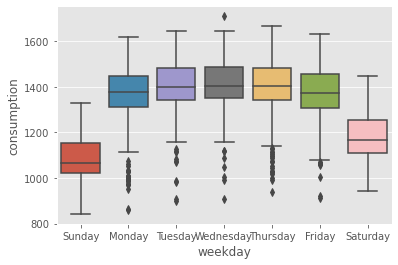

In [143]:
# box plot of consumption by day
sns.boxplot(x='weekday', y='consumption', data=train)

<AxesSubplot:xlabel='month', ylabel='solar'>

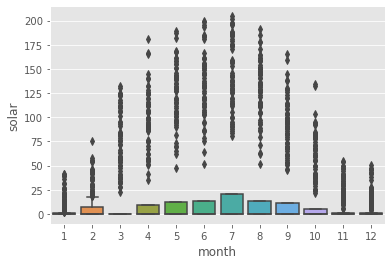

In [146]:
# box plot of solar consumption by month
sns.boxplot(x='month', y='solar', data=train)

<AxesSubplot:xlabel='month', ylabel='solar'>

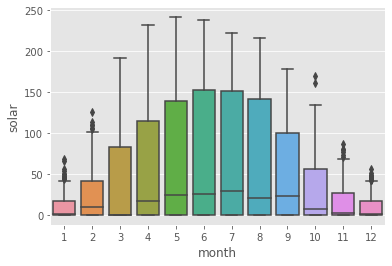

In [147]:
# box plot of solar consumption by month
sns.boxplot(x='month', y='solar', data=df)